## 1. Part 1의 code를 수정해서 (Strong likelihood, Weak likelihood) $\times$ (Uninformative prior, Weak prior, Strong prior)의 6가지 경우 비교해보기

In [1]:
import numpy as np
import scipy
import scipy.stats as st
from random import random
import inspect

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
def likelihood(theta, n, y):
    return theta**y*(1-theta)**(n-y)

thetas = np.linspace(0, 1, 1000)

a = [1,5,25]
b = [1,6,30]
n = [4,100]
y = [3,75]
m_1 = ['uninformative prior','weak prior','Strong prior']
m_2 = ['Weak likelihood','Strong likelihood']

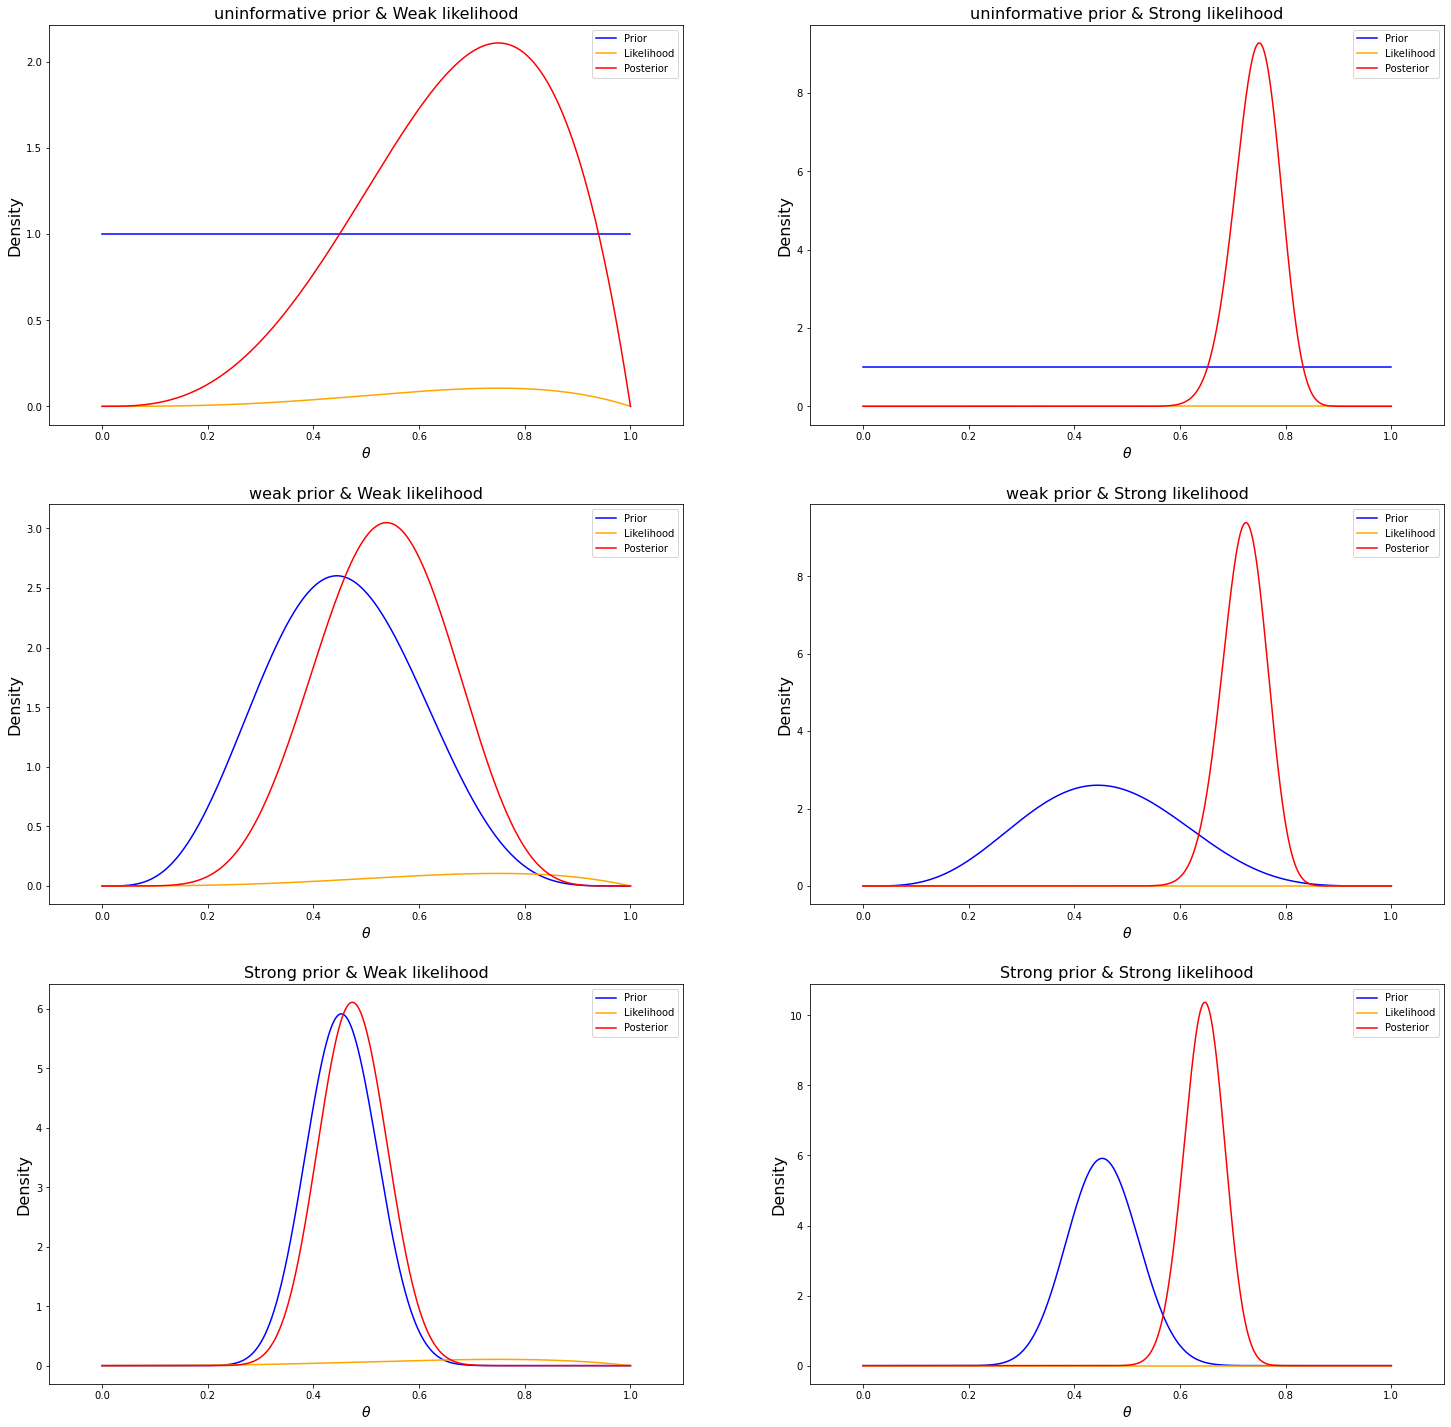

In [3]:
fig,ax = plt.subplots(3,2,figsize=(25,25))

for i in range(3):
    for j in range(2):
        ax[i,j].plot(thetas, st.beta(a[i], b[i]).pdf(thetas), label='Prior', c='blue')
        ax[i,j].plot(thetas, likelihood(thetas, n[j], y[j]), label='Likelihood', c='orange')
        ax[i,j].plot(thetas, st.beta(a=a[i]+y[j], b=b[i]+(n[j]-y[j])).pdf(thetas), label='Posterior', c='red')
        ax[i,j].set_xlim([-0.10, 1.10])
        ax[i,j].set_title(m_1[i]+' & '+m_2[j],fontsize=16)
        ax[i,j].set_xlabel(r'$\theta$', fontsize=14)
        ax[i,j].set_ylabel('Density', fontsize=16)
        ax[i,j].legend()

## 2. BDA 1.3 Exercise

Suppose that in each individual of a large population there is a pair of genes that determine eye color. Each of these genes can be x or X and they follow these rules:

xx – blue eyes \
Xx, xX (heterozygote) – brown eyes \
XX – brown eyes 

The proportion of blue-eyed individuals is $p^2$ and of heterozygotes it’s $2p(1−p)$, where $0<p<1$.

Each parent transmits one if its own genes to the child. If a parent is a heterozygote, the probability that it transmits the genes of type X is 0.5.

> Assuming random mating, show that among brown-eyed children of brown-eyed parents, the expected proportion of heterozygotes is $\frac{2p}{1+2p}$

$P\left(\right.$ child $Xx \mid$ Child brown $\&$ parent brown)

$=\frac{P\left(\right.\text { Child } Xx, \text { Child brown. Parent brown) }}{P(\text { child brown. parent brown })}$

$=\frac{P(C \text { hild } Xx, F=Xx, M=Xx)+2 P\left(C \text { hild } Xx, F=Xx, M=XX\right)}{P(C \text { hild brown }, F=Xx, M=Xx)+2 P(C \text { hild brown }, F=Xx, M=XX)+P(\text { Child brown }, F=XX, M=XX)}$

$=\frac{\frac{1}{2} \times 4 p^{2}(1-p)^{2}+2 x \frac{1}{2} \times 2 p(1-p)(1-p)^{2}}{\frac{3}{4} \times 4 p^{2}(1-p)^{2}+2 x 2 p(1-p)(1-p)^{2}+(1-p)^{4}}$

$=\frac{2 p^{2}+2 p(1-p)}{3 p^{2}+4 p(1-p)+(1-p)^{2}}$

$=\frac{2 p}{2 p+1}$

>Suppose Judy, a brown-eyed child of brown-eyed parents, marries a heterozygote, and they have n children, all brown-eyed. Find the posterior probability that Judy is a heterozygote

$p(\text{Judy Hetero}|x_1=1,x_2=1,\cdots ,x_n=1) $

$= \frac{p(x_1=1,x_2=1,\cdots ,x_n=1|\text{Judy Hetero})p(\text{Judy Hetero})}{p(x_1=1,x_2=1,\cdots ,x_n=1|\text{Judy Hetero})p(\text{Judy Hetero})+p(x_1=1,x_2=1,\cdots ,x_n=1|\text{Judy not Hetero})p(\text{Judy not Hetero})}$

$=\frac{\left(\frac{3}{4}\right)^{n} \cdot \frac{2 p}{1+2 p}}{\left(\frac{3}{4}\right)^{n} \cdot \frac{2 p}{1+2 p}+1 \cdot \frac{1}{1+2 p}}$

- H: Judy Hetero 상대 Hetro

$p(x=1|H) = 1-p(x=0|H)=1-\frac{1}{4} = \frac{3}{4} $


$p(x_1=1,x_2=1,\cdots ,x_n=1|H) = (\frac{3}{4})^n$ \
$p(x_1=1,x_2=1,\cdots ,x_n=1|\text{NOT H}) = 1$

Judy는 brown eye이기 때문에 Hetero가 아니면 XX다 $\Rightarrow$ 자식들은 반드시 brown eye

> Suppose Judy, a brown-eyed child of brown-eyed parents, marries a heterozygote, and they have n children, all brown-eyed. the probability that her first grandchild has blue eyes.

xx – blue eyes\
Xx, xX (heterozygote) – brown eyes\
XX – brown eyes

- A: Judy brown & Judy parent brown
- B: marry hetero
- C: n children brown eyes

손자가 blue eyes이기 위해서는 child는 반드시 Xx여야 한다. child가 Xx인 경우에 손자가 xx일 확률은 child의 배우자가 XX,xx,Xx인 경우로 나눠서 계산할 수 있다.

- XX: $0\times (1-p)^2$
- xx: $\frac{1}{2}\times p^2$
- Xx: $\frac{1}{4}\times 2p(1−p)$

따라서 $\frac{1}{4}\times 2p(1−p)+\frac{1}{2}\times p^2 = \frac{p}{2} $

$P(\text{Grandchild xx}|A,B,C)$\
$=P(\text{Child Xx}|A,B,C)\times \frac{p}{2}$
$=\frac{\frac{3}{4}p(\frac{3}{4})^n+\frac{1}{2}}{2p(\frac{3}{4})^n+a} \times \frac{p}{2}$

$P(\text{Child Xx}|A,B,C)$\
$=P(\text{(Child Xx,Judy Xx) or (Child Xx,Judy XX)}|A,B,C)$\
$=\frac{\frac{2 p}{1+2 p} \cdot\left(\frac{3}{4}\right)^{n}}{\frac{2 p}{1+2 p} \cdot\left(\frac{3}{4}\right)^{n}+\frac{1}{1+2 p}}\left(\frac{2}{3}\right)+\frac{\frac{1}{1+2 p}}{\frac{2 p}{1+2 p} \cdot\left(\frac{3}{4}\right)^{n}+\frac{1}{1+2 p}}\left(\frac{1}{2}\right)$

## 3. 새로운 대학병원에서의 high risk 수술의 생존율에 관한 분석. 다른 병원에서의 경험을 통해 생존율은 0.9 정도로 예상되며 0.8 미만이거나 0.97 초과일 것 같지는 않다고 생각한다.

> 1) Beta distribution으로 위의 belief을 survival rate에 관한 prior distribution으로 나타내라. Parameter alpha, beta는 어떻게 선정하면 좋을 것인가? 

- $\kappa = \alpha + \beta$, $\kappa$가 커질수록 narrow 해진다(concentration)
- $\omega = \frac{\alpha - 1}{\alpha+\beta-2}$ mode

$\omega=0.9,\kappa=52$\
$\alpha=\omega(\kappa-2)+1=0.9 \times50+1=46$\
$\beta=(1-\omega)(\kappa-2)+1=0.1\times50+1=6$

$p(\theta)\sim beta(46,6)$

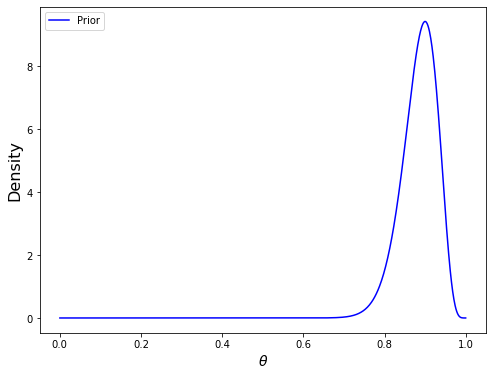

In [4]:
thetas = np.linspace(0, 1, 1000)
prior = st.beta(46, 6)

plt.figure(figsize=(8, 6))
plt.plot(thetas, prior.pdf(thetas), label='Prior',c='blue')
plt.xlabel(r'$\theta$', fontsize=14)
plt.ylabel('Density', fontsize=16)
plt.legend()

> 2) 이제 data gathering. 10명의 환자에 수술을 진행해 모두 생존하였다. survival rate에 관한 Posterior Distribution 구하기.

$p(\theta)\sim beta(46,6)$\
$p(y|\theta)=\theta^{10}(1-\theta)^0=\theta^{10}$\
$p(\theta|y)\sim beta(46+10,6+(10-10))=beta(56,6)$

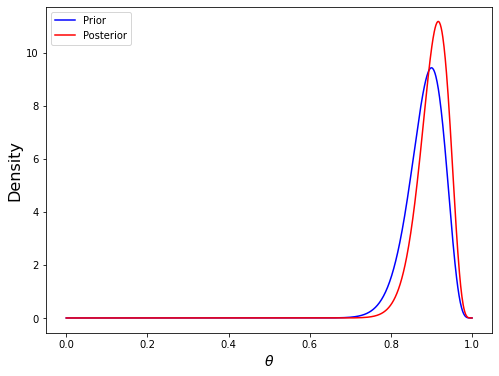

In [5]:
plt.figure(figsize=(8, 6))
post = st.beta(56,6)
plt.plot(thetas, prior.pdf(thetas), label='Prior',c='blue')
plt.plot(thetas, post.pdf(thetas), label='Posterior', c='red')
plt.xlabel(r'$\theta$', fontsize=14)
plt.ylabel('Density', fontsize=16)
plt.legend()


> 3) 다음 환자가 생존할 확률과 다음 20명의 환자 중 2명 이상 사망할 확률을 각각 예측하시오. (Hint : Posterior Predictive)

\begin{array}{l}
\theta \sim \operatorname{beta}(46,6) \\
\theta \mid y \sim \operatorname{beta}(56,6)
\end{array}

$P\left(X_{\text {new }} \mid X\right)$\
$=\int_{0}^{1} P\left(X_{\text {new }} \mid \theta\right) P(\theta \mid X) d \theta$\
$=\int_{0}^{1} \theta^{X_{new}}(1-\theta)^{1-X_{new}} \frac{r(62)}{\Gamma(56) \Gamma(6)} \theta^{55}(1-\theta)^{5} d \theta
$\
$=\frac{\Gamma(62)}{\Gamma(56) \Gamma(6)} \int_{0}^{1} \theta^{X_{new}+55}(1-\theta)^{6-X_{n e \omega}} d \theta$\
$=\frac{\Gamma(62)}{\Gamma(56) \Gamma(6)} \times \frac{\Gamma\left(X_{\text {new }}+56\right) \Gamma\left(7-X_{\text {new }})\right.}{\Gamma(63)}\int_{0}^{1} \frac{\Gamma(63)}{\Gamma\left(x_{\text {new }}+56\right) \Gamma\left(7-X_{\text {new }}\right)} \theta^{x_{\text {new }}+56-1}(1-\theta)^{7-x_{new}-1 }d \theta$\
$=\frac{\Gamma(62)}{\Gamma(56) \Gamma(6)} \times \frac{\Gamma\left(X_{\text {new }}+56\right) \Gamma\left(7-X_{\text {new }})\right.}{\Gamma(63)}$

$P\left(X_{\text {new }}=1 \mid X\right)=\frac{61 !}{55 ! 5 !} \times \frac{56 ! 5 !}{62 !}=\frac{56}{62}$\
$P\left(X_{\text {new }}=0 \mid X\right)=\frac{61 !}{55 ! 5 !} \times \frac{55 ! 6 !}{62 !}=\frac{6}{62}$


$X \sim \operatorname{Bern}\left(\frac{56}{62}\right)$\
$X=X_{1}+\cdot \cdot+X_{20} \sim B\left(20, \frac{56}{62}\right)$\
$\begin{aligned} P(x \leq 18) &=\sum_{x=0}^{18}\left(\begin{array}{c}20 \\ x\end{array}\right)\left(\frac{56}{62}\right)^{x}\left(\frac{6}{62}\right)^{20-x} \\ &=1-\sum_{x=19}^{20}\left(\begin{array}{c}20 \\ x\end{array}\right)\left(\frac{56}{62}\right)^{x}\left(\frac{6}{62}\right)^{20-x}\\ &=0.589 \end{aligned}$

- 다음 환자가 생존할 확률: 0.903
- 20명 환자 중 2명 이상 사망할 확률: 0.589